# Analyzing financial data using Nasdaq API

I will be using the Nasdaq API to extract fincancial data and analyze it. The data entails a wide range financial data sets including comprehensive metrics on various companies. I will take a look at the MER/F1 datatable which contains information such as balance sheets, cash flow statements and income statements.

The extracted information will be for a set of companies, to understand thier financial progression over time. Metrics like Accured Expenses Turnover will be part of the soup of metrics being analyzed to compare and contrast the difference between each country. The end goal being the comparitive analysis of financial data to see any patters or trends and see the ramfications of those patterns.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameters = {'api_key':'NasdaqKey', 'qopts.per_page':10000}
json_data = requests.get(api_url, params=parameters).json()


In [ ]:
data = json_data['datatable']['data']
columns = [column['name'] for column in json_data['datatable']['columns']]
df_metrics = pd.DataFrame(data, columns=columns)
df_metrics.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


In [ ]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

From here I will take the necessary columns and use those to analyze the data in order to make informed decisions about the company.

In [ ]:
# isolate the necessary columns
necessary_columns = ['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement' ]

One particular metric which I will look at is the Accured Expenses Turnover metric which tells how well a company is paying off it's expenses on yearly basis. This tells us about the financial health of the company and how well a company is performing.

In [ ]:
filtered_df = df_metrics[necessary_columns]
filtered_df = filtered_df[filtered_df['indicator']=='Accrued Expenses Turnover']

In [ ]:
filtered_df.describe()

,reportid,amount
count,1.390000e+02,139.000000
mean,1.633594e+09,26.908762
std,1.385283e+08,33.097291
min,1.504051e+09,4.689773
25%,1.543963e+09,9.675670
50%,1.581646e+09,13.753753
75%,1.622541e+09,31.777614
max,1.952498e+09,229.810427


We can see that the mean ratio is about ~26.9, with the lowest and highest being ~4.7 and ~229.8 respectably. Now lets take the country column and make it easier to read.

In [ ]:
def full_country_name(name):
    if name == 'USA':
        name = 'United States'
    elif name == 'DEU':
        name = 'Germany'
    elif name == 'JPN':
        name = 'Japan'
    elif name == 'CYM':
        name = 'Cayman Islands'
    elif name == 'BHS':
        name = 'Bahamas'
    else:
        name = 'Ireland'
    return name

filtered_df = filtered_df.copy()
filtered_df['country_name'] = filtered_df['country'].apply(full_country_name)

In [ ]:
filtered_df.columns = ['report_id','report_date','report_type','amount','company_name','country','region','indicator','statement', 'country_name']
updated_df = filtered_df.copy()
updated_df['country_name'].value_counts()

,count
country_name,
United States,31
Ireland,29
Japan,27
Cayman Islands,27
Bahamas,19
Germany,6


In [ ]:
# over here took the updated_df and created datetime objects in the report_date column
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year>=2010)&(updated_df['report_date'].dt.year<=2015)]

In [ ]:
# select only the relevant data
relevant_data = updated_df[['company_name','report_date','amount']]
relevant_data.head()

,company_name,report_date,amount
0,Deutsche Bank AG,2011-06-30,10.481948
1,Deutsche Bank AG,2011-09-30,8.161754
2,Deutsche Bank AG,2012-06-30,10.788213
3,Deutsche Bank AG,2012-09-30,9.437545
4,Deutsche Bank AG,2013-06-30,8.755041


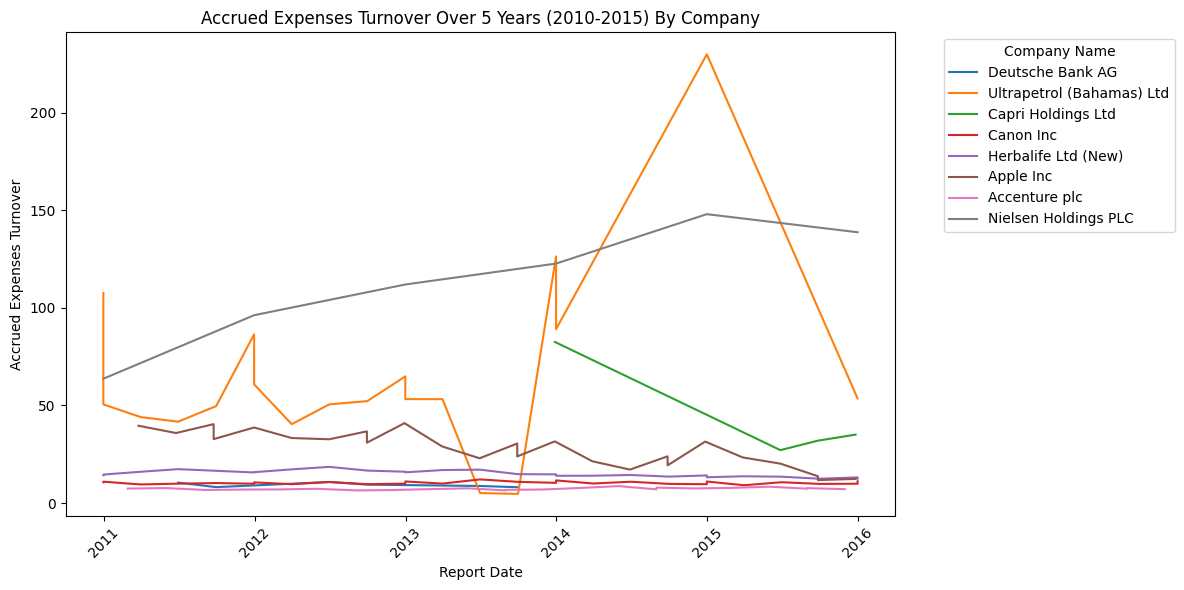

In [ ]:
# lets visualize the data for the accured expenses turnover rate for each company
plt.figure(figsize=(12,6))
for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name']==company]
    plt.plot(company_data['report_date'],company_data['amount'], label=company)

plt.legend(title='Company Name',bbox_to_anchor=(1.05,1),loc='upper left')
plt.xlabel('Report Date')
plt.xticks(rotation=45)
plt.ylabel('Accrued Expenses Turnover')
plt.title('Accrued Expenses Turnover Over 5 Years (2010-2015) By Company')
plt.tight_layout()
plt.show()

We can see that some companies are pretty stable over five years (e.g Herbalife Ltd) and some are very eratic (e.g Ultrapetrol Ltd)

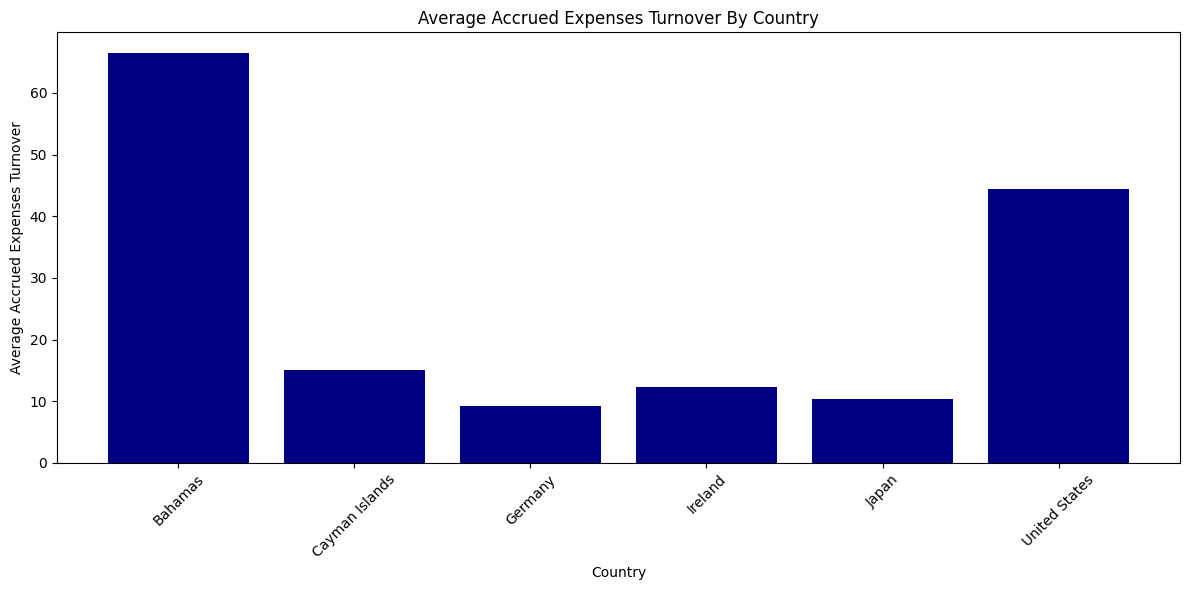

In [ ]:
# now let's visulaize the average ratio by country
country_avg = updated_df.groupby('country_name')['amount'].mean()
plt.figure(figsize=(12,6))
plt.bar(country_avg.index, country_avg.values,color='navy')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Average Accrued Expenses Turnover')
plt.title('Average Accrued Expenses Turnover By Country')
plt.tight_layout()
plt.show()

# Conclusion

So using the Nasdaq API form the MER/F1 table I have shown how the financial health of companies varies across the landscape. I took the large dataset convereted it into a more managable pandas dataframe and filtered out the relevant columns for our analysis.
I took data where the indicator-Accured Expenses Turnover is true to analyze the ratio for each company and by country. which the last two visualizations show us. The last visulization shows a high value for the Bahamas which is surprising comparing it to other countries since it is relatively under-developed. Although the company located in Bahamas has much more of eratic trend over the 5 years being analyzed, another example of that being Apple Inc.